## Notebook addressing this reviewer's comment:

The set of tumors with p53 mutations had elevated levels of AURKA or increased Plk1
pT210 phosphorylation, both of which would be consistent with simply an increased mitotic
fraction of cells in these tumors. Is there other evidence that these tumors simply had an elevated
mitotic fraction based on looking for a transcriptomic or proteomic mitotic signatures? Was the
total amount of Plk1 also increased in these tumors?

#### Library Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

import seaborn as sns
import matplotlib.pyplot as plt

import cptac
import cptac.utils as ut

en = cptac.Endometrial()

/anaconda3/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## Look at Elevated AURKA proteomic levels in TP53 Mutation

#### Specify genes

In [2]:
mut_gene = 'TP53'
omics_gene = 'AURKA'

#### Compare AURKA proteomic levels with TP53 Mutation

In [3]:
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_df_name='proteomics',omics_genes=omics_gene)

#Select only tumor samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'

#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,AURKA_proteomics,TP53_Mutation_Binary
Sample_ID,,
S002,0.311,Wildtype
S005,-0.798,Wildtype
S006,3.110,Mutated
S007,-1.650,Wildtype
S009,0.848,Mutated


#### Do t-test for significance

In [4]:
results = ut.wrap_ttest(prot_df, comparison_columns=[omics_gene+'_proteomics'], label_column=mut_gene+'_Mutation_Binary')
pval = results.loc[0,'P_Value']
results

,Comparison,P_Value
0,AURKA_proteomics,0.000016


#### Generate Plot

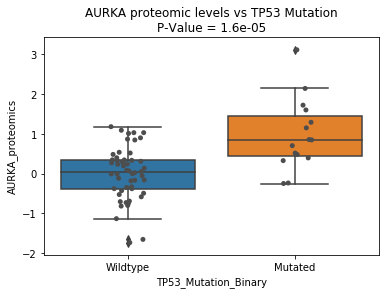

In [5]:
sns.boxplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary').set_title("AURKA proteomic levels vs TP53 Mutation\nP-Value = "+ str(round(pval,6)))
sns.stripplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary', dodge=True, jitter=True, color='.3')

## Look at increased PLK1 pT210 phosphorylation

#### Specify Genes

In [6]:
mut_gene = 'TP53'
omics_gene = 'PLK1'

#### Compare PLK1 phosphorylation with TP53 Mutation

In [7]:
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_genes=omics_gene, omics_df_name='phosphoproteomics')

#Reduce Multi-index
prot_df = en.reduce_multiindex(prot_df, flatten=True)

#Keep only Tumor Samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'
        
#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status',omics_gene+'_phosphoproteomics_T214'], axis=1)
prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,PLK1_phosphoproteomics_T210,TP53_Mutation_Binary
Sample_ID,,
S001,0.895000,Mutated
S002,0.229000,Wildtype
S003,-0.000584,Wildtype
S005,-0.513000,Wildtype
S006,1.850000,Mutated


#### Do t-test for significance

In [8]:
results = ut.wrap_ttest(df=prot_df, label_column=mut_gene+'_Mutation_Binary', comparison_columns=[omics_gene+'_phosphoproteomics_T210'])
pval = results.loc[0,'P_Value']
results

,Comparison,P_Value
0,PLK1_phosphoproteomics_T210,0.006095


#### Generate plot

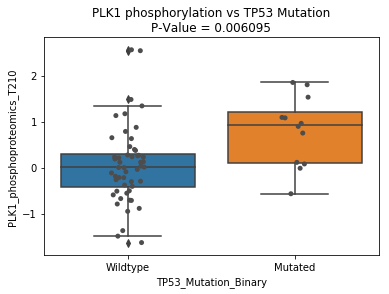

In [9]:
sns.boxplot(data=prot_df, y=omics_gene+'_phosphoproteomics_T210', x=mut_gene+'_Mutation_Binary', order=['Wildtype','Mutated']).set_title("PLK1 phosphorylation vs TP53 Mutation\nP-Value = "+ str(round(pval,6)))
sns.stripplot(data=prot_df, y=omics_gene+'_phosphoproteomics_T210', x=mut_gene+'_Mutation_Binary', dodge=True, jitter=True, color='.3',order=['Wildtype','Mutated'])

## Address this question:

Was the total amount of Plk1 also increased in these tumors?

#### Specify Genes

In [10]:
mut_gene = 'TP53'
omics_gene = 'PLK1'

#### Compare PLK1 proteomic levels with TP53 Mutation

In [11]:
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_genes=omics_gene, omics_df_name='proteomics')

#Keep only Tumor Samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'
        
#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,PLK1_proteomics,TP53_Mutation_Binary
Sample_ID,,
S001,0.29500,Mutated
S002,1.01000,Wildtype
S003,0.30100,Wildtype
S005,-0.00057,Wildtype
S006,2.46000,Mutated


#### Do t-test for significance

In [12]:
results = ut.wrap_ttest(df=prot_df, label_column=mut_gene+'_Mutation_Binary', comparison_columns=[omics_gene+'_proteomics'])
pval = results.loc[0,'P_Value']
results

,Comparison,P_Value
0,PLK1_proteomics,0.000039


#### Generate Plot

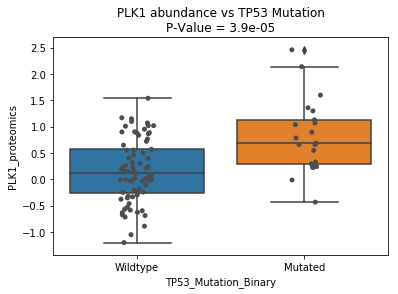

In [13]:
sns.boxplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary', order=['Wildtype','Mutated']).set_title("PLK1 abundance vs TP53 Mutation\nP-Value = "+ str(round(pval,6)))
sns.stripplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary', dodge=True, jitter=True, color='.3',order=['Wildtype','Mutated'])

## Examine CDK proteins

#### Generate list of CDK proteins in our set

In [14]:
cdks = []
for i in range(1,21):
    cdks.append('CDK' + str(i))
cdks.remove('CDK15')
cdks.remove('CDK11')
cdks

['CDK1',
 'CDK2',
 'CDK3',
 'CDK4',
 'CDK5',
 'CDK6',
 'CDK7',
 'CDK8',
 'CDK9',
 'CDK10',
 'CDK12',
 'CDK13',
 'CDK14',
 'CDK16',
 'CDK17',
 'CDK18',
 'CDK19',
 'CDK20']

#### Generate dataframe comparing TP53 mutations with CDK proteomics

In [15]:
mut_gene = 'TP53'

#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_genes=cdks, omics_df_name='proteomics')

#Keep only Tumor Samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'
        
#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
#prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,CDK1_proteomics,CDK2_proteomics,CDK3_proteomics,CDK4_proteomics,CDK5_proteomics,CDK6_proteomics,CDK7_proteomics,CDK8_proteomics,CDK9_proteomics,CDK10_proteomics,CDK12_proteomics,CDK13_proteomics,CDK14_proteomics,CDK16_proteomics,CDK17_proteomics,CDK18_proteomics,CDK19_proteomics,CDK20_proteomics,TP53_Mutation_Binary
Sample_ID,,,,,,,,,,,,,,,,,,,
S001,1.100,0.5150,NaN,-0.39900,0.5190,-0.177,0.2050,NaN,0.1610,-0.0977,-0.2220,-0.1160,-1.270,-0.000077,-0.7080,0.268,-0.0253,0.133,Mutated
S002,1.140,1.1600,-0.6920,1.18000,-0.0172,-1.170,0.2760,0.352,0.2980,-0.2280,-0.1300,0.0703,-1.460,0.478000,-0.2320,-0.796,-0.1840,0.488,Wildtype
S003,0.220,-0.2040,NaN,-0.22700,0.2740,0.264,-0.0349,NaN,-0.0989,NaN,-0.0314,-0.1740,-0.554,0.143000,-0.4560,0.101,NaN,0.926,Wildtype
S005,0.505,0.0604,-0.0481,-0.28800,-0.0195,-0.078,0.1540,NaN,-0.0300,NaN,0.1510,-0.1050,NaN,-0.026200,-0.5290,0.676,0.0700,-0.236,Wildtype
S006,1.680,0.3920,-0.5630,-0.00505,-0.2970,-1.420,0.1060,0.679,0.1380,0.2180,1.1800,0.4250,0.630,0.801000,0.0649,-0.422,-0.2920,NaN,Mutated


#### Do t-test for significance

In [16]:
comp_cols = list(prot_df.columns)
comp_cols.remove('TP53_Mutation_Binary')

results = ut.wrap_ttest(df=prot_df, label_column=mut_gene+'_Mutation_Binary', comparison_columns=comp_cols, verbose=True)
results

CDK1_proteomics :  0.0005339867846353341
CDK2_proteomics :  0.0014899900096606048
CDK3_proteomics :  0.9347291137313891
CDK4_proteomics :  0.14848958328756848
CDK5_proteomics :  0.4697379607178582
CDK6_proteomics :  0.8955749663561232
CDK7_proteomics :  0.3628231052461005
CDK8_proteomics :  0.9569620118641029
CDK9_proteomics :  0.05604321186927323
CDK10_proteomics :  0.5525967559691646
CDK12_proteomics :  9.985871329918245e-06
CDK13_proteomics :  0.20795759487884463
CDK14_proteomics :  0.9673349523925909
CDK16_proteomics :  0.001463644613940428
CDK17_proteomics :  0.8194632646453963
CDK18_proteomics :  0.7756290100125969
CDK19_proteomics :  0.7621802930840611
CDK20_proteomics :  0.01812765966022225


,Comparison,P_Value
0,CDK12_proteomics,0.000010
1,CDK1_proteomics,0.000534
2,CDK16_proteomics,0.001464
3,CDK2_proteomics,0.001490


#### Format dataframe to plot all CDK proteins

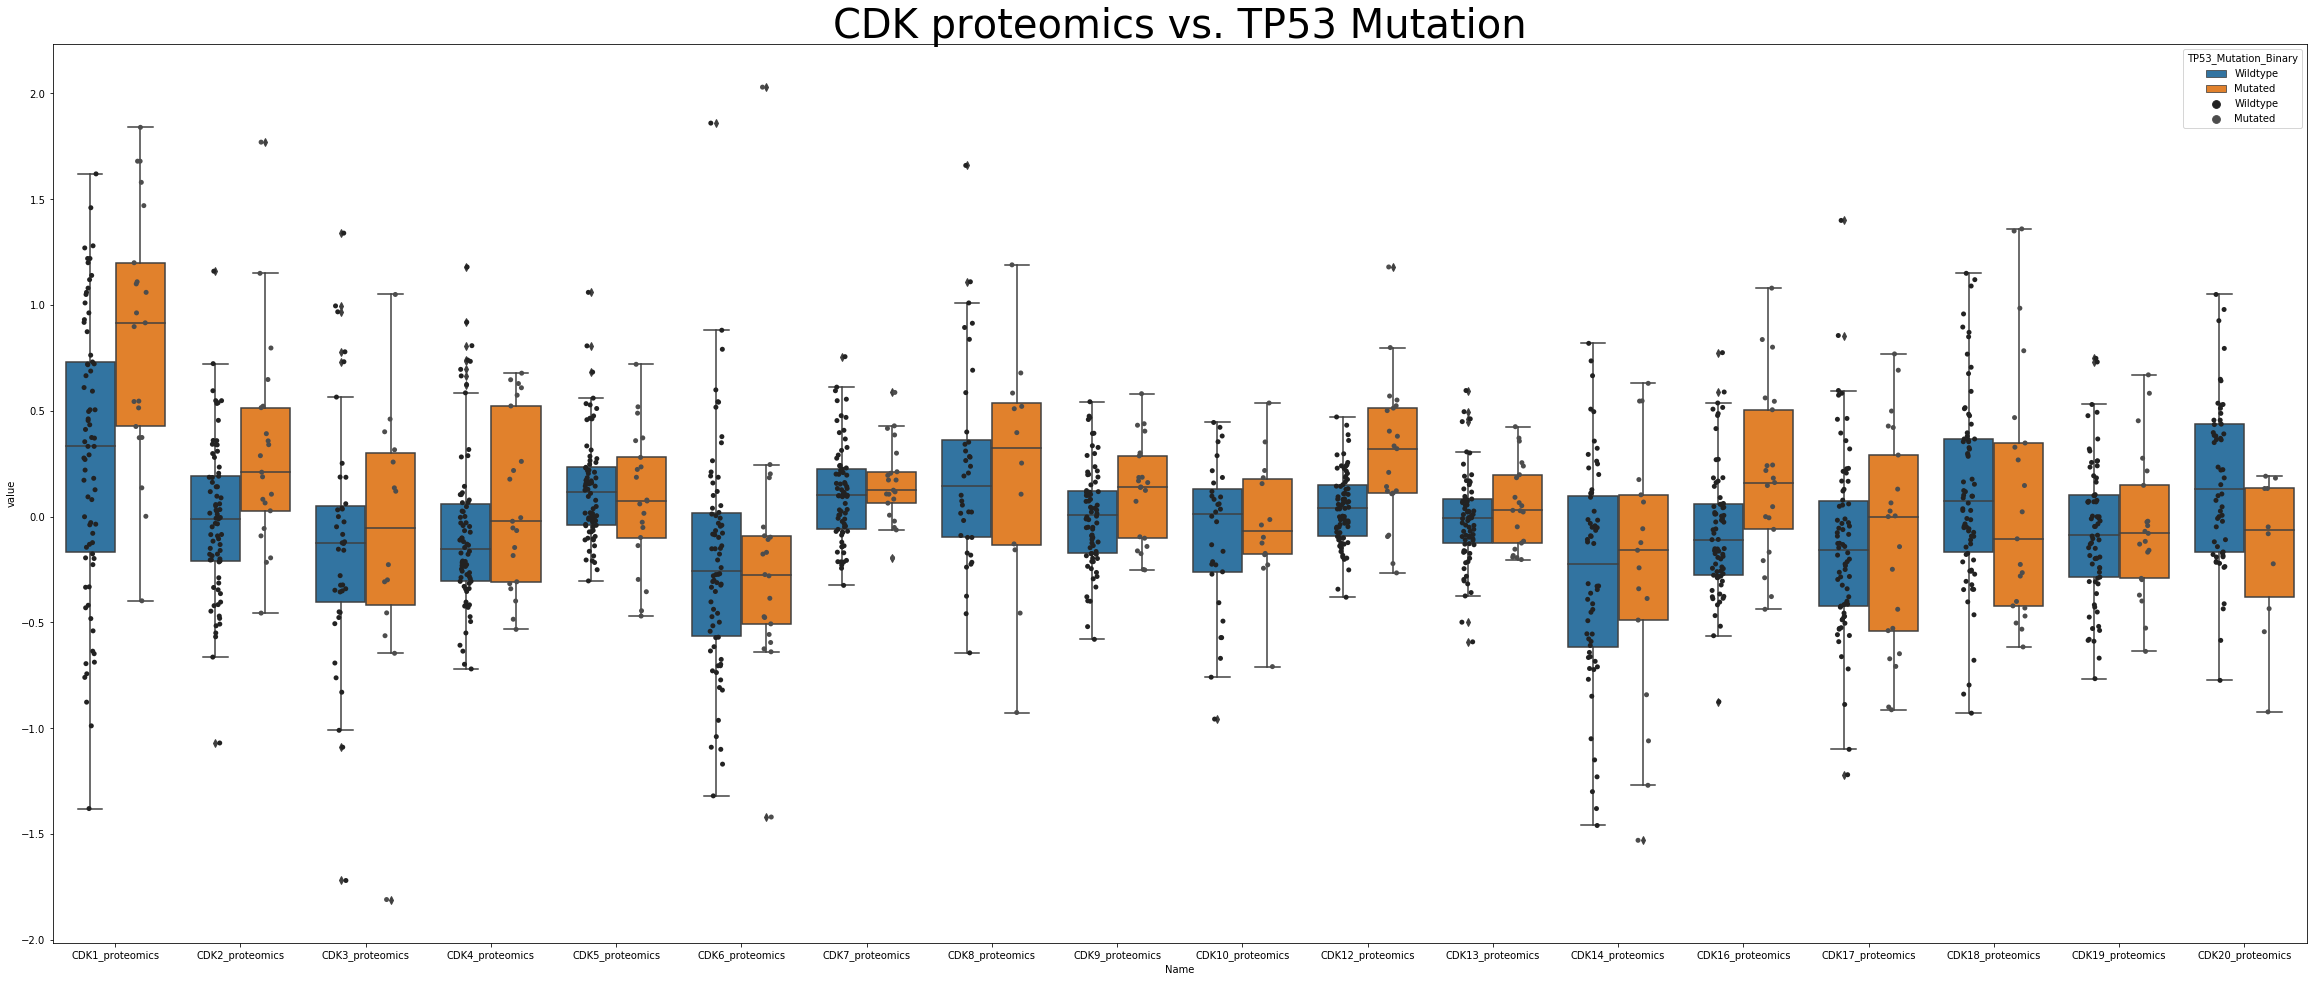

In [17]:
a4_dims = (40.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
plotdf = pd.melt(prot_df, id_vars=['TP53_Mutation_Binary'], value_vars=comp_cols)

#Make plot
boxplot = sns.boxplot(data=plotdf, y='value', x='Name',hue='TP53_Mutation_Binary', hue_order=['Wildtype','Mutated']).set_title("CDK proteomics vs. TP53 Mutation",fontsize = '40')
stripplot = sns.stripplot(data=plotdf, y='value', x='Name',hue='TP53_Mutation_Binary', hue_order=['Wildtype','Mutated'], dodge=True, jitter=True, color='.3')

## WEE1 Kinase

In [18]:
mut_gene = 'TP53'
omics_gene = 'WEE1'

In [19]:
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_df_name='proteomics',omics_genes=omics_gene)

#Select only tumor samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'

#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,WEE1_proteomics,TP53_Mutation_Binary
Sample_ID,,
S001,0.344,Mutated
S002,0.257,Wildtype
S003,-0.030,Wildtype
S005,-0.643,Wildtype
S006,0.104,Mutated


#### Do t-test for significance

In [20]:
results = ut.wrap_ttest(prot_df, comparison_columns=[omics_gene+'_proteomics'], label_column=mut_gene+'_Mutation_Binary', verbose=True)
results

WEE1_proteomics :  0.409739993856143
No significant comparisons.


#### Generate plot

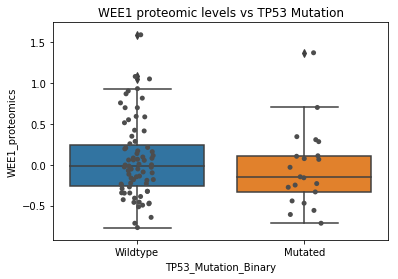

In [21]:
sns.boxplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated']).set_title("WEE1 proteomic levels vs TP53 Mutation")
sns.stripplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary', dodge=True, jitter=True, color='.3',order=['Wildtype','Mutated'])

## CDH1 proteomics

In [22]:
mut_gene = 'TP53'
omics_gene = 'CDH1'
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_df_name='proteomics',omics_genes=omics_gene)

#Select only tumor samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'

#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,CDH1_proteomics,TP53_Mutation_Binary
Sample_ID,,
S001,0.621,Mutated
S002,1.530,Wildtype
S003,0.701,Wildtype
S005,0.977,Wildtype
S006,0.713,Mutated


In [23]:
results = ut.wrap_ttest(prot_df, comparison_columns=[omics_gene+'_proteomics'], label_column=mut_gene+'_Mutation_Binary', verbose=True)
results

CDH1_proteomics :  0.06709651245181412
No significant comparisons.


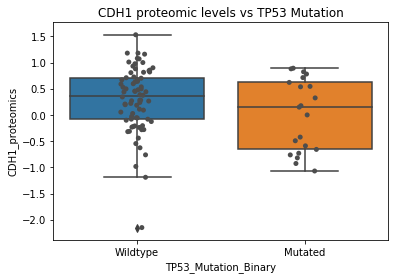

In [24]:
sns.boxplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated']).set_title("CDH1 proteomic levels vs TP53 Mutation")
sns.stripplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated'], dodge=True, jitter=True, color='.3')

## TPX2

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5650473/

In [25]:
mut_gene = 'TP53'
omics_gene = 'TPX2'
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_df_name='proteomics',omics_genes=omics_gene)

#Select only tumor samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'

#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,TPX2_proteomics,TP53_Mutation_Binary
Sample_ID,,
S001,0.925,Mutated
S002,0.717,Wildtype
S003,-0.786,Wildtype
S005,-0.290,Wildtype
S006,2.090,Mutated


#### Do t-test for significance

In [29]:
results = ut.wrap_ttest(prot_df, comparison_columns=[omics_gene+'_proteomics'], label_column=mut_gene+'_Mutation_Binary', verbose=True)
pval = results.loc[0, 'P_Value']
results

TPX2_proteomics :  3.0940449511652e-08


,Comparison,P_Value
0,TPX2_proteomics,3.094045e-08


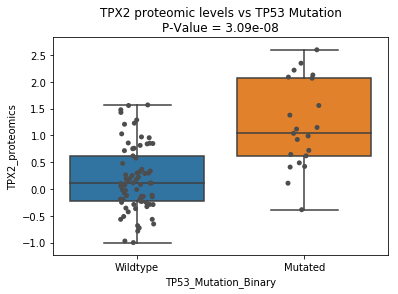

In [31]:
sns.boxplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated']).set_title("TPX2 proteomic levels vs TP53 Mutation\nP-Value = " + str(round(pval, 10)))
sns.stripplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated'], dodge=True, jitter=True, color='.3')

## TPX2 Phosphorylation

In [79]:
mut_gene = 'TP53'
omics_gene = 'TPX2'
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_df_name='phosphoproteomics',omics_genes=omics_gene)


prot_df = en.reduce_multiindex(prot_df, flatten=True)

#Select only tumor samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']


#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'

#Drop unneeded columns
prot_df = prot_df[['TPX2_phosphoproteomics_S738','TP53_Mutation_Binary']]
prot_df


Name,TPX2_phosphoproteomics_S738,TP53_Mutation_Binary
Sample_ID,,
S001,-0.13500,Mutated
S002,0.69600,Wildtype
S003,-1.56000,Wildtype
S005,-0.30800,Wildtype
S006,0.94200,Mutated
S007,-0.39200,Wildtype
S008,-0.32200,Mutated
S009,0.65900,Mutated
S010,-0.27700,Wildtype


In [80]:
results = ut.wrap_ttest(prot_df, comparison_columns=[omics_gene+'_phosphoproteomics_S738'], label_column=mut_gene+'_Mutation_Binary', verbose=True)
pval = results.loc[0, 'P_Value']
results

TPX2_phosphoproteomics_S738 :  0.00021924310264273254


,Comparison,P_Value
0,TPX2_phosphoproteomics_S738,0.000219


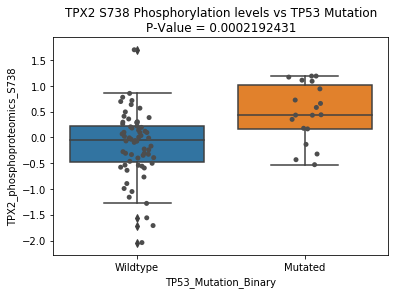

In [81]:
sns.boxplot(data=prot_df, y=omics_gene+'_phosphoproteomics_S738', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated']).set_title("TPX2 S738 Phosphorylation levels vs TP53 Mutation\nP-Value = " + str(round(pval, 10)))
sns.stripplot(data=prot_df, y=omics_gene+'_phosphoproteomics_S738', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated'], dodge=True, jitter=True, color='.3')

## CDC20

In [32]:
mut_gene = 'TP53'
omics_gene = 'CDC20'
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_df_name='proteomics',omics_genes=omics_gene)

#Select only tumor samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'

#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,CDC20_proteomics,TP53_Mutation_Binary
Sample_ID,,
S001,0.5460,Mutated
S002,0.0504,Wildtype
S003,0.2370,Wildtype
S005,-0.3950,Wildtype
S006,1.5700,Mutated


#### Do t-test for significance

In [33]:
results = ut.wrap_ttest(prot_df, comparison_columns=[omics_gene+'_proteomics'], label_column=mut_gene+'_Mutation_Binary', verbose=True)
pval = results.loc[0, 'P_Value']
results

CDC20_proteomics :  0.0004645795199681593


,Comparison,P_Value
0,CDC20_proteomics,0.000465


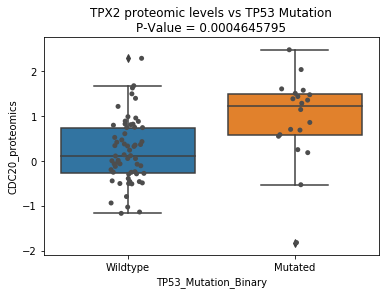

In [34]:
sns.boxplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated']).set_title("TPX2 proteomic levels vs TP53 Mutation\nP-Value = " + str(round(pval, 10)))
sns.stripplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated'], dodge=True, jitter=True, color='.3')

## KIFC1

In [35]:
mut_gene = 'TP53'
omics_gene = 'KIFC1'
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_df_name='proteomics',omics_genes=omics_gene)

#Select only tumor samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'

#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,KIFC1_proteomics,TP53_Mutation_Binary
Sample_ID,,
S001,0.0413,Mutated
S002,0.4150,Wildtype
S003,-0.5360,Wildtype
S005,-0.3750,Wildtype
S006,1.2800,Mutated


#### Do t-test for significance

In [36]:
results = ut.wrap_ttest(prot_df, comparison_columns=[omics_gene+'_proteomics'], label_column=mut_gene+'_Mutation_Binary', verbose=True)
pval = results.loc[0, 'P_Value']
results

KIFC1_proteomics :  1.7527596097285096e-06


,Comparison,P_Value
0,KIFC1_proteomics,0.000002


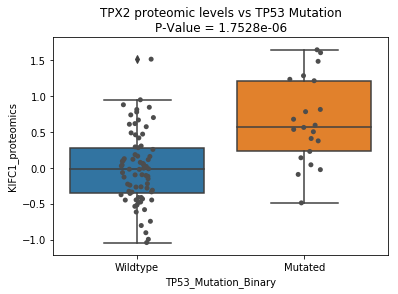

In [38]:
sns.boxplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated']).set_title("TPX2 proteomic levels vs TP53 Mutation\nP-Value = " + str(round(pval, 10)))
sns.stripplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated'], dodge=True, jitter=True, color='.3')

## CCNB1

In [39]:
mut_gene = 'TP53'
omics_gene = 'CCNB1'
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_df_name='proteomics',omics_genes=omics_gene)

#Select only tumor samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'

#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,CCNB1_proteomics,TP53_Mutation_Binary
Sample_ID,,
S001,1.2900,Mutated
S002,1.0800,Wildtype
S003,0.5510,Wildtype
S005,-0.0836,Wildtype
S006,1.7400,Mutated


#### Do t-test for significance

In [40]:
results = ut.wrap_ttest(prot_df, comparison_columns=[omics_gene+'_proteomics'], label_column=mut_gene+'_Mutation_Binary', verbose=True)
pval = results.loc[0, 'P_Value']
results

CCNB1_proteomics :  1.5034287218484184e-05


,Comparison,P_Value
0,CCNB1_proteomics,0.000015


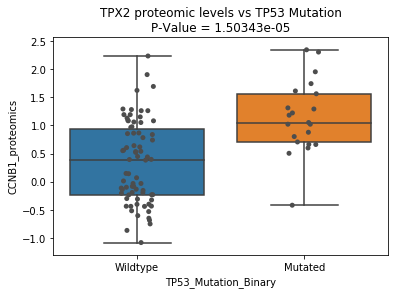

In [41]:
sns.boxplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated']).set_title("TPX2 proteomic levels vs TP53 Mutation\nP-Value = " + str(round(pval, 10)))
sns.stripplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated'], dodge=True, jitter=True, color='.3')

## ANLN

In [42]:
mut_gene = 'TP53'
omics_gene = 'ANLN'
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_df_name='proteomics',omics_genes=omics_gene)

#Select only tumor samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'

#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,ANLN_proteomics,TP53_Mutation_Binary
Sample_ID,,
S001,0.6950,Mutated
S002,0.5750,Wildtype
S003,0.0534,Wildtype
S005,-0.4880,Wildtype
S006,2.6900,Mutated


#### Do t-test for significance

In [43]:
results = ut.wrap_ttest(prot_df, comparison_columns=[omics_gene+'_proteomics'], label_column=mut_gene+'_Mutation_Binary', verbose=True)
pval = results.loc[0, 'P_Value']
results

ANLN_proteomics :  2.853150351659287e-05


,Comparison,P_Value
0,ANLN_proteomics,0.000029


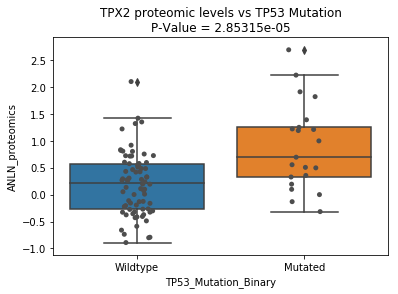

In [44]:
sns.boxplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated']).set_title("TPX2 proteomic levels vs TP53 Mutation\nP-Value = " + str(round(pval, 10)))
sns.stripplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated'], dodge=True, jitter=True, color='.3')

## HMMR

In [45]:
mut_gene = 'TP53'
omics_gene = 'HMMR'
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_df_name='proteomics',omics_genes=omics_gene)

#Select only tumor samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'

#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,HMMR_proteomics,TP53_Mutation_Binary
Sample_ID,,
S001,-0.298,Mutated
S002,0.280,Wildtype
S003,0.120,Wildtype
S005,-0.266,Wildtype
S006,2.320,Mutated


#### Do t-test for significance

In [47]:
results = ut.wrap_ttest(prot_df, comparison_columns=[omics_gene+'_proteomics'], label_column=mut_gene+'_Mutation_Binary', verbose=True)
results

HMMR_proteomics :  0.12125378036842688
No significant comparisons.


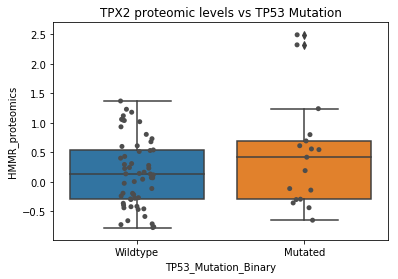

In [48]:
sns.boxplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated']).set_title("TPX2 proteomic levels vs TP53 Mutation")
sns.stripplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated'], dodge=True, jitter=True, color='.3')

## KIF20A

In [49]:
mut_gene = 'TP53'
omics_gene = 'KIF20A'
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_df_name='proteomics',omics_genes=omics_gene)

#Select only tumor samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'

#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,KIF20A_proteomics,TP53_Mutation_Binary
Sample_ID,,
S001,0.6840,Mutated
S002,0.7000,Wildtype
S003,0.0682,Wildtype
S005,-0.0106,Wildtype
S006,0.9840,Mutated


#### Do t-test for significance

In [50]:
results = ut.wrap_ttest(prot_df, comparison_columns=[omics_gene+'_proteomics'], label_column=mut_gene+'_Mutation_Binary', verbose=True)
pval = results.loc[0, 'P_Value']
results

KIF20A_proteomics :  0.0003638185428331852


,Comparison,P_Value
0,KIF20A_proteomics,0.000364


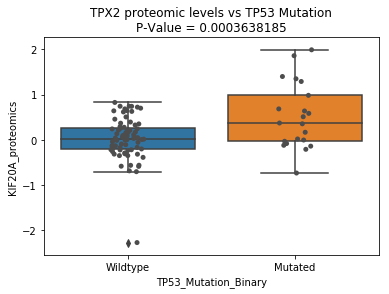

In [51]:
sns.boxplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated']).set_title("TPX2 proteomic levels vs TP53 Mutation\nP-Value = " + str(round(pval, 10)))
sns.stripplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated'], dodge=True, jitter=True, color='.3')

## AURKB

In [52]:
mut_gene = 'TP53'
omics_gene = 'AURKB'
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_df_name='proteomics',omics_genes=omics_gene)

#Select only tumor samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'

#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,AURKB_proteomics,TP53_Mutation_Binary
Sample_ID,,
S002,0.4560,Wildtype
S003,-0.0623,Wildtype
S005,-0.2020,Wildtype
S006,1.0900,Mutated
S007,0.4000,Wildtype


#### Do t-test for significance

In [53]:
results = ut.wrap_ttest(prot_df, comparison_columns=[omics_gene+'_proteomics'], label_column=mut_gene+'_Mutation_Binary', verbose=True)
pval = results.loc[0, 'P_Value']
results

AURKB_proteomics :  0.00011387200579958794


,Comparison,P_Value
0,AURKB_proteomics,0.000114


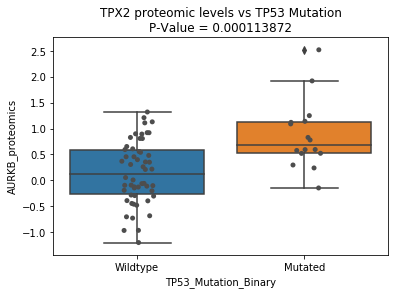

In [54]:
sns.boxplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated']).set_title("TPX2 proteomic levels vs TP53 Mutation\nP-Value = " + str(round(pval, 10)))
sns.stripplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated'], dodge=True, jitter=True, color='.3')

## CCNB2

In [55]:
mut_gene = 'TP53'
omics_gene = 'CCNB2'
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_df_name='proteomics',omics_genes=omics_gene)

#Select only tumor samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'

#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,CCNB2_proteomics,TP53_Mutation_Binary
Sample_ID,,
S001,0.921,Mutated
S002,0.392,Wildtype
S003,-0.477,Wildtype
S005,-0.146,Wildtype
S006,1.230,Mutated


#### Do t-test for significance

In [56]:
results = ut.wrap_ttest(prot_df, comparison_columns=[omics_gene+'_proteomics'], label_column=mut_gene+'_Mutation_Binary', verbose=True)
pval = results.loc[0, 'P_Value']
results

CCNB2_proteomics :  0.002128978050931532


,Comparison,P_Value
0,CCNB2_proteomics,0.002129


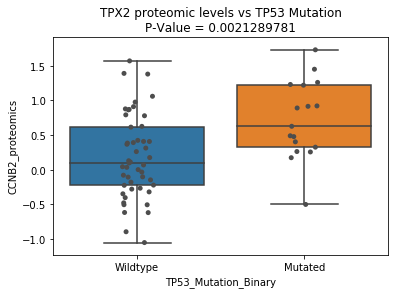

In [57]:
sns.boxplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated']).set_title("TPX2 proteomic levels vs TP53 Mutation\nP-Value = " + str(round(pval, 10)))
sns.stripplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated'], dodge=True, jitter=True, color='.3')

## RRM2

In [58]:
mut_gene = 'TP53'
omics_gene = 'RRM2'
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_df_name='proteomics',omics_genes=omics_gene)

#Select only tumor samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'

#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,RRM2_proteomics,TP53_Mutation_Binary
Sample_ID,,
S001,0.799,Mutated
S002,1.210,Wildtype
S003,0.000,Wildtype
S005,-0.108,Wildtype
S006,2.880,Mutated


#### Do t-test for significance

In [59]:
results = ut.wrap_ttest(prot_df, comparison_columns=[omics_gene+'_proteomics'], label_column=mut_gene+'_Mutation_Binary', verbose=True)
pval = results.loc[0, 'P_Value']
results

RRM2_proteomics :  0.0003317159100058077


,Comparison,P_Value
0,RRM2_proteomics,0.000332


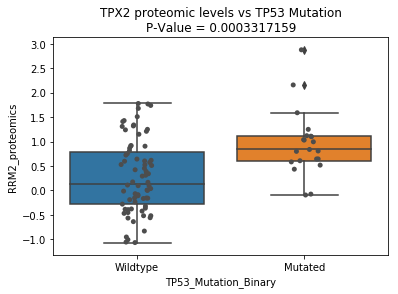

In [60]:
sns.boxplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated']).set_title("TPX2 proteomic levels vs TP53 Mutation\nP-Value = " + str(round(pval, 10)))
sns.stripplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated'], dodge=True, jitter=True, color='.3')

## RACGAP1

In [61]:
mut_gene = 'TP53'
omics_gene = 'RACGAP1'
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_df_name='proteomics',omics_genes=omics_gene)

#Select only tumor samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'

#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,RACGAP1_proteomics,TP53_Mutation_Binary
Sample_ID,,
S001,0.299,Mutated
S002,2.310,Wildtype
S003,-0.193,Wildtype
S005,0.322,Wildtype
S006,0.402,Mutated


#### Do t-test for significance

In [63]:
results = ut.wrap_ttest(prot_df, comparison_columns=[omics_gene+'_proteomics'], label_column=mut_gene+'_Mutation_Binary', verbose=True)
results

RACGAP1_proteomics :  0.42992502145109
No significant comparisons.


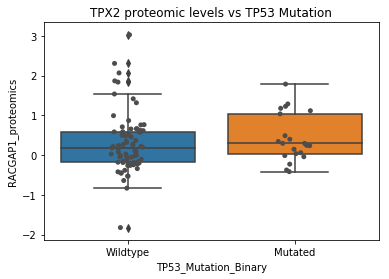

In [64]:
sns.boxplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated']).set_title("TPX2 proteomic levels vs TP53 Mutation")
sns.stripplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated'], dodge=True, jitter=True, color='.3')

## CENPF

In [65]:
mut_gene = 'TP53'
omics_gene = 'CENPF'
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_df_name='proteomics',omics_genes=omics_gene)

#Select only tumor samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'

#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,CENPF_proteomics,TP53_Mutation_Binary
Sample_ID,,
S001,0.599,Mutated
S002,0.570,Wildtype
S003,0.138,Wildtype
S005,-0.284,Wildtype
S006,1.400,Mutated


#### Do t-test for significance

In [66]:
results = ut.wrap_ttest(prot_df, comparison_columns=[omics_gene+'_proteomics'], label_column=mut_gene+'_Mutation_Binary', verbose=True)
pval = results.loc[0, 'P_Value']
results

CENPF_proteomics :  0.00011353226992534302


,Comparison,P_Value
0,CENPF_proteomics,0.000114


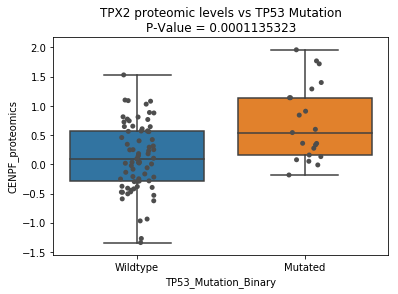

In [67]:
sns.boxplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated']).set_title("TPX2 proteomic levels vs TP53 Mutation\nP-Value = " + str(round(pval, 10)))
sns.stripplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated'], dodge=True, jitter=True, color='.3')

## PRC1

In [68]:
mut_gene = 'TP53'
omics_gene = 'PRC1'
#Join omics to mutations
prot_df = en.join_omics_to_mutations(mutations_genes=mut_gene, omics_df_name='proteomics',omics_genes=omics_gene)

#Select only tumor samples
prot_df = prot_df.loc[prot_df['Sample_Status'] == 'Tumor']

#Create binary classification of Mutated/Wildtype
for ind, row in prot_df.iterrows():
    if row[mut_gene + '_Mutation_Status'] == 'Wildtype_Tumor':
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Wildtype'
    else:
        prot_df.loc[ind, mut_gene + '_Mutation_Binary'] = 'Mutated'

#Drop unneeded columns
prot_df = prot_df.drop([mut_gene+'_Mutation', mut_gene+'_Location', mut_gene+'_Mutation_Status','Sample_Status'], axis=1)
prot_df = prot_df.dropna(axis=0)
prot_df.head()

Name,PRC1_proteomics,TP53_Mutation_Binary
Sample_ID,,
S001,0.3270,Mutated
S002,1.4900,Wildtype
S003,-0.6590,Wildtype
S005,0.0826,Wildtype
S006,0.5380,Mutated


#### Do t-test for significance

In [70]:
results = ut.wrap_ttest(prot_df, comparison_columns=[omics_gene+'_proteomics'], label_column=mut_gene+'_Mutation_Binary', verbose=True)
results

PRC1_proteomics :  0.09391207805655406
No significant comparisons.


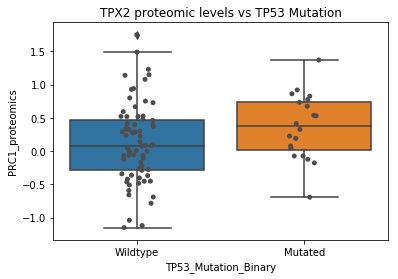

In [71]:
sns.boxplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated']).set_title("TPX2 proteomic levels vs TP53 Mutation")
sns.stripplot(data=prot_df, y=omics_gene+'_proteomics', x=mut_gene+'_Mutation_Binary',order=['Wildtype','Mutated'], dodge=True, jitter=True, color='.3')